In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data

# Download MNIST dataset
[yann.lecun.com/exdb/mnist](yann.lecun.com/exdb/mnist)

In [2]:
mnist = input_data.read_data_sets('../MNIST_data', one_hot=True)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist_train = {}
mnist_train['images'] = mnist.train.images
mnist_train['labels'] = mnist.train.labels

In [4]:
type(mnist_train['images'])

numpy.ndarray

In [5]:
mnist_train['images'].shape

(55000, 784)

In [6]:
mnist_train['labels'].shape

(55000, 10)

In [7]:
def draw_mnist(image, label):
    '''
    Arg
        image - 1D array, length = 784 
        label - int
            one_hot vector
    '''
    label_index = np.argmax(label)
    image_2d = np.reshape(image, [28, 28])
    fig = plt.figure(figsize=(1,1))
    plt.imshow(image_2d, cmap='gray')
    plt.axis('off')
    plt.title("Number : {}".format(label_index))
    plt.show()

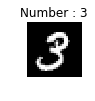

In [8]:
draw_mnist(mnist_train['images'][1], mnist_train['labels'][1])

In [9]:
np.max(mnist_train['images'][0])

0.99607849

In [10]:
np.min(mnist_train['labels'][0])

0.0

In [11]:
mnist_test = {}
mnist_val = {}
mnist_test['images'] = mnist.test.images
mnist_test['labels'] = mnist.test.labels
mnist_val['images'] = mnist.validation.images
mnist_val['labels'] = mnist.validation.labels

In [12]:
def get_mask(mask_type='prewitX'):
    '''
    Arg:
        mask_type - string
            prewitX
            prewitY
            embos1
            embos2
            laplace4
            laplace8
            unsharp4
            unsharp8        
    return :
        mask
            numpy 3 by 3 matrix
    '''
    if mask_type == 'prewitX':
        mask = [1, 1, 1, 0, 0, 0, -1, -1, -1]
    if mask_type == 'prewitY':
        mask = [1, 0, -1, 1, 0, -1, 1, 0, -1]
    if mask_type == 'embos1':
        mask = [1, 0, 0, 0, 0, 0, 0, 0, -1]
    if mask_type == 'embos2':
        mask = [0, 0, 1, 0, 0, 0, -1, 0, 0]
    if mask_type == 'laplace4':
        mask = [0, 1, 0, 1, -4, 1, 0, 1, 0]
    if mask_type == 'laplace8':
        mask = [1, 1, 1, 1, -8, 1, 1, 1, 1]
    if mask_type == 'unsharp4':
        mask = [0, -1, 0, -1, 5, -1, 0, -1, 0]
    if mask_type == 'unsharp8':
        mask = [-1, -1, -1, -1, 8, -1, -1, -1, -1]         
    mask = np.reshape(np.array(mask), [3, 3])
    return mask

def conv(img, filt):
    '''
    Arg :
        img - 2D array
        filt - 2D array
    return :
        image convoluted with filt
    '''
    ir, ic = img.shape
    fr, fc = filt.shape
    
    conv_img = np.zeros((ir, ic))
    for r in range(ir):
        for c in range(ic):
            value = 0
            for i in range(fr):
                for j in range(fc):
                    if r+i>=0 and r+i<ir and c+j>=0 and c+j<ic :
                        value += filt[i][j]*img[r+i][c+j]
            conv_img[r][c] = clip(value)
    return conv_img

    
def clip(x, vmax = 1.0, vmin = 0.0):
    '''
    Arg:
        x - float
        vmax - float
            default to be 1.0
        vmin - float
            default to be 0.0
    return :
        clipped x [vmin, vmax]
    '''
    if x>vmax:
        return vmax
    if x<vmin:
        return vmin
    return x
    
def conv_study(gray_image, mask_type):
    '''
    Arg:
        gray_image - 2D array
        mask_type - string
            prewitX
            prewitY
            embos1
            embos2
            laplace4
            laplace8
            unsharp4
            unsharp8        
    '''
    mask = get_mask(mask_type)
    conv_image = conv(gray_image, mask)
    nconv_image = conv_image/np.max(conv_image)
    fig = plt.figure(figsize=(17,17))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.imshow(gray_image, cmap = 'gray')
    ax1.set_title('original')
    ax1.set_axis_off()
    ax2.imshow(conv_image, cmap = 'gray')
    ax2.set_title(mask_type)
    ax2.set_axis_off()
    plt.show()

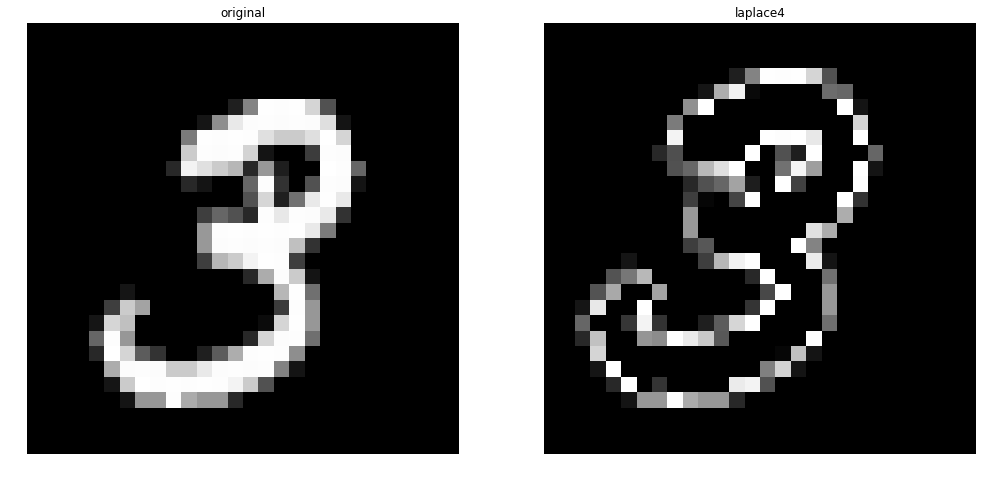

In [13]:
gray_image = np.reshape(mnist_train['images'][1], [28,28])
mask_type = 'laplace4'
conv_study(gray_image, mask_type)

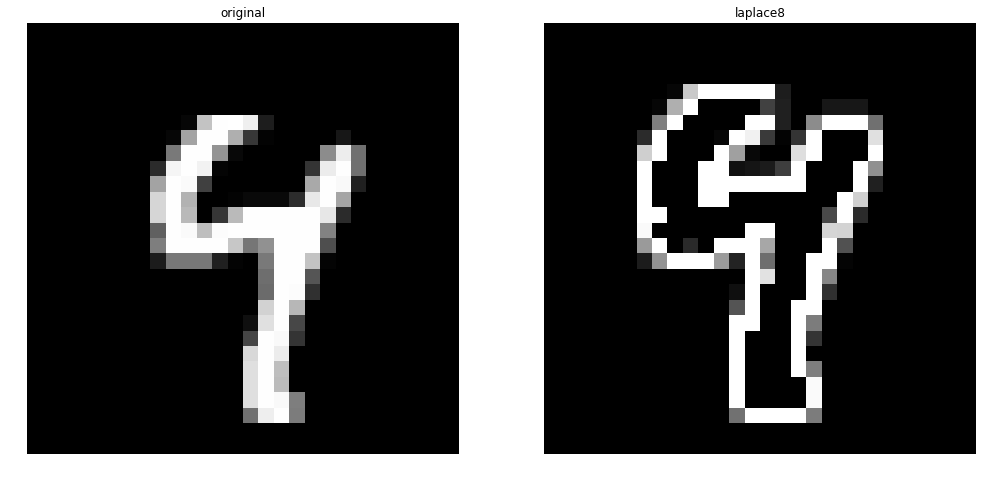

In [18]:
gray_image = np.reshape(mnist_train['images'][2], [28,28])
mask_type = 'laplace8'
conv_study(gray_image, mask_type)